In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import VAR 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic 

Load sensors data

In [2]:
data_sensor = pd.read_csv('../pruebas_datos/2020-12-03.csv')

In [3]:
data_sensor.head()

,time,measurement,site_id,mote_id,sensor_id,sensor_status,sensor_value
0,2020-12-03T00:00:00.263755,battery,parral,00-17-0d-00-00-59-d1-f1,FFC_SENSOR_BAT,FFC_SENSOR_OK,3.1876
1,2020-12-03T00:00:01.508517,battery,parral,00-17-0d-00-00-59-cd-ba,FFC_SENSOR_BAT,FFC_SENSOR_OK,3.1984
2,2020-12-03T00:00:02.233210,battery,parral,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_BAT,FFC_SENSOR_OK,3.1668
3,2020-12-03T00:00:03.477323,battery,parral,00-17-0d-00-00-59-a9-fb,FFC_SENSOR_BAT,FFC_SENSOR_OK,3.1248
4,2020-12-03T00:00:04.178922,battery,parral,00-17-0d-00-00-59-d1-e6,FFC_SENSOR_BAT,FFC_SENSOR_OK,3.1704


Let's build a dataframe with temperature and humidity data from sensors

In [4]:
sensor_th = data_sensor[data_sensor.measurement == 'air_temp'].append(data_sensor[data_sensor.measurement == 'air_hum'])

In [5]:
sensor_th_ok = sensor_th[sensor_th.sensor_status == 'FFC_SENSOR_OK']

In [6]:
sensor_th_ok.head()

,time,measurement,site_id,mote_id,sensor_id,sensor_status,sensor_value
213896,2020-12-03T00:00:02.233210,air_temp,parral,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x0,FFC_SENSOR_OK,19.279
213897,2020-12-03T00:00:02.233210,air_temp,parral,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x1,FFC_SENSOR_OK,19.957
213898,2020-12-03T00:00:02.233210,air_temp,parral,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x2,FFC_SENSOR_OK,20.341
213899,2020-12-03T00:00:02.233210,air_temp,parral,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x3,FFC_SENSOR_OK,20.654
213900,2020-12-03T00:00:03.477323,air_temp,parral,00-17-0d-00-00-59-a9-fb,FFC_SENSOR_SHT3x1,FFC_SENSOR_OK,19.936


Trying out different data manipulation techniques

In [7]:
#Pivot
sensor_th_ok['time'] = pd.to_datetime(sensor_th_ok['time'])
data_pivot = sensor_th_ok.pivot(index='time', columns=['mote_id', 'sensor_id', 'measurement'], values='sensor_value')

/var/folders/_z/x0zcrx6j7lqb_z4xl709hdqh0000gn/T/ipykernel_2755/2289852153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_th_ok['time'] = pd.to_datetime(sensor_th_ok['time'])


In [8]:
data_pivot.head()

mote_id                    00-17-0d-00-00-59-cd-c9                    \
sensor_id                        FFC_SENSOR_SHT3x0 FFC_SENSOR_SHT3x1   
measurement                               air_temp          air_temp   
time                                                                   
2020-12-03 00:00:02.233210                  19.279            19.957   
2020-12-03 00:00:03.477323                     NaN               NaN   
2020-12-03 00:00:04.178922                     NaN               NaN   
2020-12-03 00:00:06.141080                     NaN               NaN   
2020-12-03 00:00:07.407819                     NaN               NaN   

mote_id                                                         \
sensor_id                  FFC_SENSOR_SHT3x2 FFC_SENSOR_SHT3x3   
measurement                         air_temp          air_temp   
time                                                             
2020-12-03 00:00:02.233210            20.341            20.654   
2020-12-03 00:00:03.477323               NaN               NaN   
2020-12-03 00:00:04.178922               NaN               NaN   
2020-12-03 00:00:06.141080               NaN               NaN   
2020-12-03 00:00:07.407819               NaN               NaN   

mote_id                    00-17-0d-00-00-59-a9-fb                    \
sensor_id                        FFC_SENSOR_SHT3x1 FFC_SENSOR_SHT3x2   
measurement                               air_temp          air_temp   
time                                                                   
2020-12-03 00:00:02.233210                     NaN               NaN   
2020-12-03 00:00:03.477323                  19.936            20.459   
2020-12-03 00:00:04.178922                     NaN               NaN   
2020-12-03 00:00:06.141080                     NaN               NaN   
2020-12-03 00:00:07.407819                     NaN               NaN   

mote_id                                      00-17-0d-00-00-59-d1-e6  \
sensor_id                  FFC_SENSOR_SHT3x3       FFC_SENSOR_SHT3x0   
measurement                         air_temp                air_temp   
time                                                                   
2020-12-03 00:00:02.233210               NaN                     NaN   
2020-12-03 00:00:03.477323            20.742                     NaN   
2020-12-03 00:00:04.178922               NaN                  19.719   
2020-12-03 00:00:06.141080               NaN                     NaN   
2020-12-03 00:00:07.407819               NaN                     NaN   

mote_id                                                         ...  \
sensor_id                  FFC_SENSOR_SHT3x1 FFC_SENSOR_SHT3x2  ...   
measurement                         air_temp          air_temp  ...   
time                                                            ...   
2020-12-03 00:00:02.233210               NaN               NaN  ...   
2020-12-03 00:00:03.477323               NaN               NaN  ...   
2020-12-03 00:00:04.178922            20.248            20.478  ...   
2020-12-03 00:00:06.141080               NaN               NaN  ...   
2020-12-03 00:00:07.407819               NaN               NaN  ...   

mote_id                    00-17-0d-00-00-59-cf-ee                    \
sensor_id                        FFC_SENSOR_SHT3x2 FFC_SENSOR_SHT3x3   
measurement                                air_hum           air_hum   
time                                                                   
2020-12-03 00:00:02.233210                     NaN               NaN   
2020-12-03 00:00:03.477323                     NaN               NaN   
2020-12-03 00:00:04.178922                     NaN               NaN   
2020-12-03 00:00:06.141080                     NaN               NaN   
2020-12-03 00:00:07.407819                     NaN               NaN   

mote_id                    00-17-0d-00-00-59-cd-db                    \
sensor_id                        FFC_SENSOR_SHT3x0 FFC_SENSOR_SHT3x1   
measurement              

In [9]:
# Sampling to 10 minutes
data_pivot_resample = data_pivot.resample('10T').mean()

In [10]:
data_pivot_resample.head()

mote_id             00-17-0d-00-00-59-cd-c9                    \
sensor_id                 FFC_SENSOR_SHT3x0 FFC_SENSOR_SHT3x1   
measurement                        air_temp          air_temp   
time                                                            
2020-12-03 00:00:00               17.803617         18.123267   
2020-12-03 00:10:00               16.755356         18.019983   
2020-12-03 00:20:00               17.563883         18.924117   
2020-12-03 00:30:00               17.799083         18.748033   
2020-12-03 00:40:00               17.102186         17.999508   

mote_id                                                  \
sensor_id           FFC_SENSOR_SHT3x2 FFC_SENSOR_SHT3x3   
measurement                  air_temp          air_temp   
time                                                      
2020-12-03 00:00:00         19.032450         20.143750   
2020-12-03 00:10:00         18.984119         19.731305   
2020-12-03 00:20:00         19.417350         19.814200   
2020-12-03 00:30:00         19.044233         19.394117   
2020-12-03 00:40:00         18.567881         18.932627   

mote_id             00-17-0d-00-00-59-a9-fb                    \
sensor_id                 FFC_SENSOR_SHT3x1 FFC_SENSOR_SHT3x2   
measurement                        air_temp          air_temp   
time                                                            
2020-12-03 00:00:00               19.567717         20.028283   
2020-12-03 00:10:00               18.058933         19.064483   
2020-12-03 00:20:00               17.902898         19.191695   
2020-12-03 00:30:00               17.687383         18.823350   
2020-12-03 00:40:00               17.324433         18.307333   

mote_id                               00-17-0d-00-00-59-d1-e6  \
sensor_id           FFC_SENSOR_SHT3x3       FFC_SENSOR_SHT3x0   
measurement                  air_temp                air_temp   
time                                                            
2020-12-03 00:00:00         20.561450               19.493483   
2020-12-03 00:10:00         20.039250               18.790136   
2020-12-03 00:20:00         19.829390               18.200433   
2020-12-03 00:30:00         19.346467               16.679559   
2020-12-03 00:40:00         18.859700               16.174117   

mote_id                                                  ...  \
sensor_id           FFC_SENSOR_SHT3x1 FFC_SENSOR_SHT3x2  ...   
measurement                  air_temp          air_temp  ...   
time                                                     ...   
2020-12-03 00:00:00         19.997017         20.339750  ...   
2020-12-03 00:10:00         19.437915         19.874712  ...   
2020-12-03 00:20:00         19.016600         19.459100  ...   
2020-12-03 00:30:00         17.441864         17.978983  ...   
2020-12-03 00:40:00         17.156067         17.770167  ...   

mote_id             00-17-0d-00-00-59-cf-ee                    \
sensor_id                 FFC_SENSOR_SHT3x2 FFC_SENSOR_SHT3x3   
measurement                         air_hum           air_hum   
time                                                            
2020-12-03 00:00:00               56.231661         54.602305   
2020-12-03 00:10:00               58.946700         56.765583   
2020-12-03 00:20:00               59.884525         57.601220   
2020-12-03 00:30:00               59.894883         58.266383   
2020-12-03 00:40:00               61.422567         59.497500   

mote_id             00-17-0d-00-00-59-cd-db                    \
sensor_id                 FFC_SENSOR_SHT3x0 FFC_SENSOR_SHT3x1   
measurement                         air_hum           air_hum   
time                                                            
2020-12-03 00:00:00               56.316136         53.096814   
2020-12-03 00:10:00               56.269917         53.281750   
2020-12-03 00:20:00               56.151650         53.097750   
2020-12-03 00:30:00               59.833017         55.377441   
2020-12-03 00:40:00        

I'll work with the data_pivot dataframe

In [41]:
#GroupBy
data_group = sensor_th_ok.groupby(['time', 'mote_id', 'sensor_id', 'measurement'])['sensor_value'].agg('mean')

In [42]:
data_group.head(10)

time                        mote_id                  sensor_id          measurement
2020-12-03T00:00:02.233210  00-17-0d-00-00-59-cd-c9  FFC_SENSOR_SHT3x0  air_hum        58.409
                                                                        air_temp       19.279
                                                     FFC_SENSOR_SHT3x1  air_hum        55.331
                                                                        air_temp       19.957
                                                     FFC_SENSOR_SHT3x2  air_hum        51.982
                                                                        air_temp       20.341
                                                     FFC_SENSOR_SHT3x3  air_hum        50.712
                                                                        air_temp       20.654
2020-12-03T00:00:03.477323  00-17-0d-00-00-59-a9-fb  FFC_SENSOR_SHT3x1  air_hum        49.014
                                                                      

In [43]:
df_data_group = pd.DataFrame(data_group.unstack(level='measurement')).reset_index()

In [44]:
df_data_group.head()

measurement,time,mote_id,sensor_id,air_hum,air_temp
0,2020-12-03T00:00:02.233210,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x0,58.409,19.279
1,2020-12-03T00:00:02.233210,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x1,55.331,19.957
2,2020-12-03T00:00:02.233210,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x2,51.982,20.341
3,2020-12-03T00:00:02.233210,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x3,50.712,20.654
4,2020-12-03T00:00:03.477323,00-17-0d-00-00-59-a9-fb,FFC_SENSOR_SHT3x1,49.014,19.936


In [48]:
mote_names = df_data_group.mote_id.unique()
sensor_names = df_data_group.sensor_id.unique()

In [51]:
df_data_group[(df_data_group.mote_id=='00-17-0d-00-00-59-cd-c9') & (df_data_group.sensor_id=='FFC_SENSOR_SHT3x0')]

measurement,time,mote_id,sensor_id,air_hum,air_temp
0,2020-12-03T00:00:02.233210,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x0,58.409,19.279
33,2020-12-03T00:00:12.046546,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x0,64.761,19.265
63,2020-12-03T00:00:21.868299,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x0,66.592,19.223
90,2020-12-03T00:00:30.987425,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x0,68.008,19.151
120,2020-12-03T00:00:41.515315,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x0,68.821,19.009
...,...,...,...,...,...
253447,2020-12-03T23:59:15.319531,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x0,37.211,19.671
253477,2020-12-03T23:59:26.599519,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x0,37.170,19.615
253507,2020-12-03T23:59:35.565374,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x0,37.083,19.602
253537,2020-12-03T23:59:45.469356,00-17-0d-00-00-59-cd-c9,FFC_SENSOR_SHT3x0,37.373,19.559


Intento fallido

In [35]:
df_data_group['time'] = pd.to_datetime(df_data_group['time'])

In [37]:
df_data_group = df_data_group.set_index('time')

In [39]:
df_resample = df_data_group.resample('10T').mean()

In [40]:
df_resample.head()

measurement,air_hum,air_temp
time,,
2020-12-03 00:00:00,55.508740,19.014244
2020-12-03 00:10:00,57.482228,18.431225
2020-12-03 00:20:00,57.289368,18.376236
2020-12-03 00:30:00,58.816554,17.881276
2020-12-03 00:40:00,60.064678,17.390342



Load weather stations data

In [56]:
data_ws = pd.read_csv('../pruebas_datos/campanacura_parral-1.csv')

In [60]:
data_ws.head()

,Fecha Hora,Temp. promedio aire,Precipitación horaria,Humed. rel. promedio,Presión atmosférica,Radiación solar máx.,Veloc. máx. viento,Temp. Mínima,Temp. Máxima,Dirección del viento,Grados día (base 10),Horas frío (base 7)
0,2021-06-01 00:00:00,"17,4","0,0","66,5","1000,0","1,0","0,0","16,9","17,7","0,0","643,8",--
1,2021-06-01 01:00:00,"17,0","0,0","67,6","1000,0","1,0","0,0","15,9","17,5","0,0",--,--
2,2021-06-01 02:00:00,"15,5","0,0","71,9","1000,0","1,0","0,0","15,3","15,8","0,0",--,--
3,2021-06-01 03:00:00,"14,7","0,0","75,2","999,8","1,0","0,0","14,3","15,1","0,0",--,--
4,2021-06-01 04:00:00,"14,0","0,0","78,4","999,9","1,0","0,0","13,4","14,3","0,0",--,--


In [59]:
data_ws['Fecha Hora'] = pd.to_datetime(data_ws['Fecha Hora'])

---------

Let's use data_pivot_resample 

I'll use two time series: ('00-17-0d-00-00-59-cd-c9', 'FFC_SENSOR_SHT3x0', 'air_temp'), ('00-17-0d-00-00-59-cd-c9', 'FFC_SENSOR_SHT3x0', 'air_hum') 

In [11]:
data_pivot_resample[('00-17-0d-00-00-59-cd-c9', 'FFC_SENSOR_SHT3x0', 'air_temp')]

time
2020-12-03 00:00:00    17.803617
2020-12-03 00:10:00    16.755356
2020-12-03 00:20:00    17.563883
2020-12-03 00:30:00    17.799083
2020-12-03 00:40:00    17.102186
                         ...    
2020-12-03 23:10:00    21.694717
2020-12-03 23:20:00    21.116712
2020-12-03 23:30:00    20.541633
2020-12-03 23:40:00    20.191847
2020-12-03 23:50:00    19.717633
Freq: 10T, Name: (00-17-0d-00-00-59-cd-c9, FFC_SENSOR_SHT3x0, air_temp), Length: 144, dtype: float64

In [12]:
data_pivot_resample[('00-17-0d-00-00-59-cd-c9', 'FFC_SENSOR_SHT3x0', 'air_hum')]

time
2020-12-03 00:00:00    64.996717
2020-12-03 00:10:00    66.537814
2020-12-03 00:20:00    60.376050
2020-12-03 00:30:00    59.042567
2020-12-03 00:40:00    62.833983
                         ...    
2020-12-03 23:10:00    33.480283
2020-12-03 23:20:00    34.722898
2020-12-03 23:30:00    35.808783
2020-12-03 23:40:00    35.927186
2020-12-03 23:50:00    36.874400
Freq: 10T, Name: (00-17-0d-00-00-59-cd-c9, FFC_SENSOR_SHT3x0, air_hum), Length: 144, dtype: float64

Creating the dataframe

In [15]:
df = pd.DataFrame({'temp': data_pivot_resample[('00-17-0d-00-00-59-cd-c9', 'FFC_SENSOR_SHT3x0', 'air_temp')], 'hum': data_pivot_resample[('00-17-0d-00-00-59-cd-c9', 'FFC_SENSOR_SHT3x0', 'air_hum')]})

In [16]:
df.head()

,temp,hum
time,,
2020-12-03 00:00:00,17.803617,64.996717
2020-12-03 00:10:00,16.755356,66.537814
2020-12-03 00:20:00,17.563883,60.376050
2020-12-03 00:30:00,17.799083,59.042567
2020-12-03 00:40:00,17.102186,62.833983


In [18]:
print(df.shape)

(144, 2)


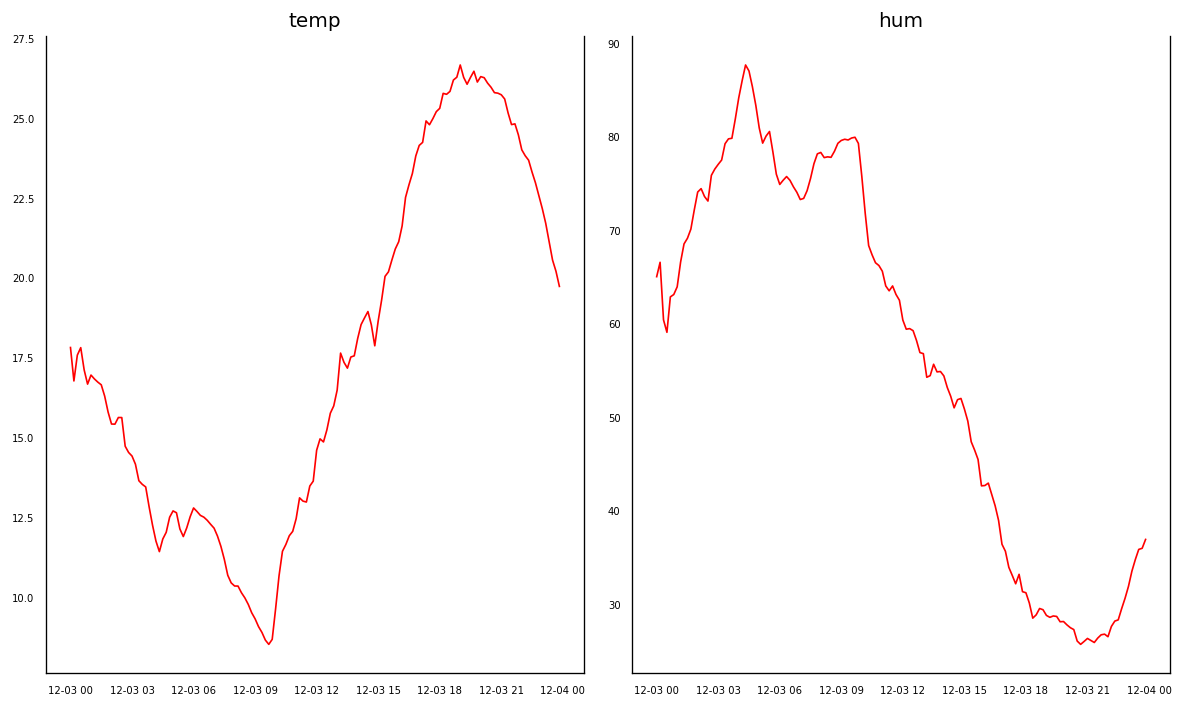

In [22]:
# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Testing causation using Granger's causality test

In [23]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [24]:
grangers_causation_matrix(df, variables = df.columns) 

,temp_x,hum_x
temp_y,1.0000,0.0717
hum_y,0.0002,1.0000


Cointegration test

In [25]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [26]:
cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
temp   ::  3.84      > 12.3212   =>   False
hum    ::  1.44      > 4.1296    =>   False


Split the series into training and testing data

In [27]:
nobs = 8
df_train, df_test = df[0:-nobs], df[-nobs:]

In [28]:
# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(136, 2)
(8, 2)


Check for stationarity

In [29]:

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [30]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "temp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.3217
 No. Lags Chosen       = 6
 Critical value 1%     = -3.482
 Critical value 5%     = -2.884
 Critical value 10%    = -2.579
 => P-Value = 0.6192. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "hum" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.1522
 No. Lags Chosen       = 1
 Critical value 1%     = -3.48
 Critical value 5%     = -2.883
 Critical value 10%    = -2.578
 => P-Value = 0.9694. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [31]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [32]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "temp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0963
 No. Lags Chosen       = 5
 Critical value 1%     = -3.482
 Critical value 5%     = -2.884
 Critical value 10%    = -2.579
 => P-Value = 0.246. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "hum" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.4381
 No. Lags Chosen       = 0
 Critical value 1%     = -3.48
 Critical value 5%     = -2.883
 Critical value 10%    = -2.578
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [33]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [34]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "temp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.5676
 No. Lags Chosen       = 4
 Critical value 1%     = -3.482
 Critical value 5%     = -2.884
 Critical value 10%    = -2.579
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "hum" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.2956
 No. Lags Chosen       = 4
 Critical value 1%     = -3.482
 Critical value 5%     = -2.884
 Critical value 10%    = -2.579
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [2]:
import statsmodels 
statsmodels.__version__

'0.12.2'

In [35]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -1.9715089029841042
BIC :  -1.841117212989138
FPE :  0.13924871944085937
HQIC:  -1.9185227047312428 

Lag Order = 2
AIC :  -2.356678004343154
BIC :  -2.1382839192987317
FPE :  0.0947412794123962
HQIC:  -2.267932668046165 

Lag Order = 3
AIC :  -2.550326330725587
BIC :  -2.2430533343529446
FPE :  0.07807209770767337
HQIC:  -2.4254675807624366 

Lag Order = 4
AIC :  -2.5459933111148585
BIC :  -2.148950079513316
FPE :  0.07842993402373356
HQIC:  -2.3846613780997252 

Lag Order = 5
AIC :  -2.6773385531885094
BIC :  -2.189618608258612
FPE :  0.06880297950519049
HQIC:  -2.4791680660672673 

Lag Order = 6
AIC :  -2.728085286997606
BIC :  -2.148766639638934
FPE :  0.06543619305496667
HQIC:  -2.4927051629301866 

Lag Order = 7
AIC :  -2.7139468989299327
BIC :  -2.0420916816562498
FPE :  0.06642169983136817
HQIC:  -2.440980230936511 

Lag Order = 8
AIC :  -2.6327668614266093
BIC :  -1.867420950027004
FPE :  0.07211769043721
HQIC:  -2.321830803777301 

Lag Order = 9
AIC :  -2

In [36]:
model_fitted = model.fit(3)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 30, Sep, 2021
Time:                     14:52:58
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.24305
Nobs:                     131.000    HQIC:                  -2.42547
Log likelihood:          -190.716    FPE:                  0.0780721
AIC:                     -2.55033    Det(Omega_mle):       0.0703526
--------------------------------------------------------------------
Results for equation temp
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.002120         0.030272           -0.070           0.944
L1.temp        -0.389711         0.113771           -3.425           0.001
L1.hum          0.009353         0.036218            0.258           0.796
L2.temp   

Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [37]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

NameError: name 'adjust' is not defined

Forecasting with VAR model using statsmodels

In [38]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

3


array([[ 0.28446102,  1.37512203],
       [ 0.04359463, -0.52879407],
       [-0.22981808, -0.44054633]])

In [55]:
df_differenced.values

array([[ 1.85678814e+00, -7.70286045e+00],
       [-5.73327401e-01,  4.82828023e+00],
       [-9.32096893e-01,  5.12489972e+00],
       [ 2.50977119e-01, -3.53833277e+00],
       [ 7.30076836e-01,  5.72527684e-01],
       [-4.05697458e-01,  1.82819407e+00],
       [ 2.10977401e-02, -7.16864972e-01],
       [ 1.65853107e-02, -1.33294746e+00],
       [-2.70842655e-01,  3.75507062e-01],
       [-1.44149435e-01,  1.07802401e+00],
       [ 1.23848870e-01, -1.44664689e-01],
       [ 3.71035028e-01, -1.55002373e+00],
       [ 2.12314407e-01, -1.20972119e+00],
       [-2.09918079e-01,  3.64669492e-01],
       [-8.97460067e-01,  3.23690948e+00],
       [ 7.04329738e-01, -2.08711556e+00],
       [ 8.22642270e-02, -1.61816230e-01],
       [-1.44281921e-01, -4.42180791e-02],
       [-2.59032203e-01,  1.28301299e+00],
       [ 4.01651412e-01, -1.22235028e+00],
       [ 3.29793785e-02, -4.60412429e-01],
       [-5.42932203e-01,  2.00783616e+00],
       [ 5.00516949e-02,  1.83156780e-01],
       [ 7.

In [57]:
df_differenced.values[-3:]

array([[ 0.28446102,  1.37512203],
       [ 0.04359463, -0.52879407],
       [-0.22981808, -0.44054633]])

In [59]:
model_fitted.k_ar

3

In [58]:
model_fitted.params

,temp,hum
const,-0.002120,-0.003490
L1.temp,-0.389711,-1.290091
L1.hum,0.009353,-0.551331
L2.temp,-0.322629,-0.591614
L2.hum,0.029522,-0.432799
L3.temp,-0.012194,-0.833892
L3.hum,0.048915,-0.219962


In [64]:
np.save('var_model.npy', model_fitted.params)

In [65]:
coef = np.load('var_model.npy')

In [66]:
coef

array([[-0.00212039, -0.00348975],
       [-0.3897108 , -1.29009071],
       [ 0.00935292, -0.55133123],
       [-0.32262906, -0.59161407],
       [ 0.0295218 , -0.43279885],
       [-0.01219446, -0.83389232],
       [ 0.0489146 , -0.21996196]])

In [69]:
prediction = coef[0][0] + b[-1][0]*coef[1][0] + b[-1][1]*coef[1][1] + b[-2][0]*coef[3][0] + b[-2][1]*coef[3][1] + b[-3][0]*coef[5][0] + b[-3][1]*coef[5][1]

-0.0021203911546038763

In [ ]:
def predict(data, coef, nobs):
    for i in range(nobs):
        prediction = data[]
    prediction += coef[0][0]

In [39]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,temp_2d,hum_2d
time,,
2020-12-03 22:40:00,0.117441,0.199269
2020-12-03 22:50:00,-0.011282,0.141731
2020-12-03 23:00:00,-0.047152,0.065748
2020-12-03 23:10:00,0.033009,-0.175340
2020-12-03 23:20:00,0.007599,0.028268
2020-12-03 23:30:00,-0.016853,0.052337
2020-12-03 23:40:00,-0.005660,-0.016292
2020-12-03 23:50:00,0.008205,-0.012442


In [60]:
df1 = pd.DataFrame({'temp':[23, 25, 27], 'hum':[51, 52, 49]})

In [85]:
b = df1.values
a = df_differenced.values[-3:]

In [86]:
input_prediccion = np.concatenate((a, b), axis=0)

In [63]:
fc = model_fitted.forecast(y=forecast_input, steps=4)
df_forecast = pd.DataFrame(fc, index=df1.index[-4:], columns=df1.columns + '_2d')
df_forecast

,temp_2d,hum_2d
0,0.117441,0.199269
1,-0.011282,0.141731
2,-0.047152,0.065748
3,0.033009,-0.175340


Invert the transformation to get the real forecast

In [40]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [43]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)
#df_results.loc[:, ['temp', 'hum']]

In [44]:
df_results

,temp_2d,hum_2d,temp_1d,temp_forecast,hum_1d,hum_forecast
time,,,,,,
2020-12-03 22:40:00,0.117441,0.199269,-0.253672,23.045582,0.330284,28.597183
2020-12-03 22:50:00,-0.011282,0.141731,-0.264953,22.780629,0.472015,29.069197
2020-12-03 23:00:00,-0.047152,0.065748,-0.312105,22.468524,0.537763,29.606960
2020-12-03 23:10:00,0.033009,-0.175340,-0.279096,22.189428,0.362423,29.969384
2020-12-03 23:20:00,0.007599,0.028268,-0.271497,21.917931,0.390691,30.360075
2020-12-03 23:30:00,-0.016853,0.052337,-0.288349,21.629582,0.443028,30.803103
2020-12-03 23:40:00,-0.005660,-0.016292,-0.294009,21.335573,0.426737,31.229840
2020-12-03 23:50:00,0.008205,-0.012442,-0.285804,21.049769,0.414294,31.644134


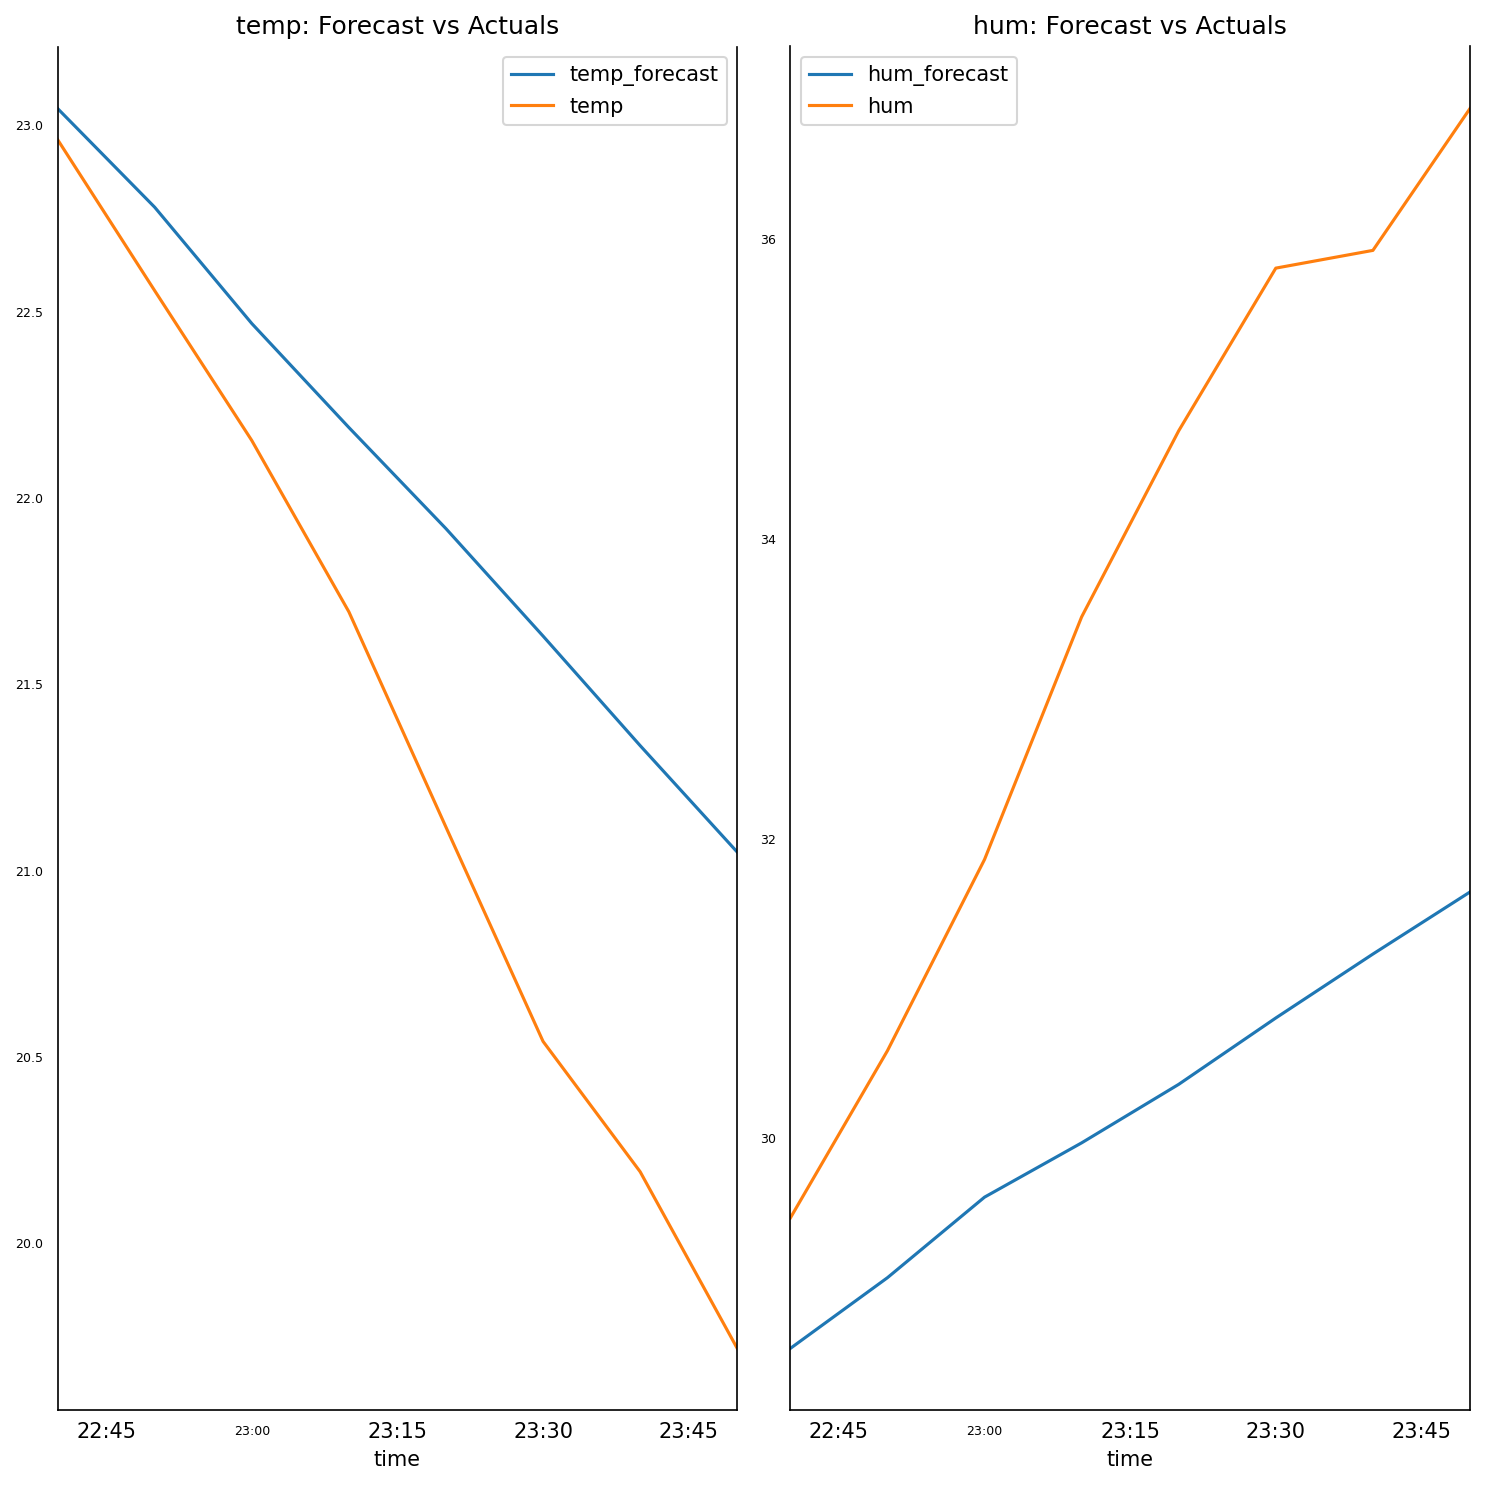

In [45]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [49]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: temp')
accuracy_prod = forecast_accuracy(df_results['temp_forecast'].values, df_test['temp'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: hum')
accuracy_prod = forecast_accuracy(df_results['hum_forecast'].values, df_test['hum'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: temp
mape :  0.0332
me :  0.6851
mae :  0.6851
mpe :  0.0332
rmse :  0.8146
corr :  0.998
minmax :  0.0317

Forecast Accuracy of: hum
mape :  0.0991
me :  -3.4308
mae :  3.4308
mpe :  -0.0991
rmse :  3.7745
corr :  0.9859
minmax :  0.0991


/var/folders/_z/x0zcrx6j7lqb_z4xl709hdqh0000gn/T/ipykernel_2755/3645764043.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
/var/folders/_z/x0zcrx6j7lqb_z4xl709hdqh0000gn/T/ipykernel_2755/3645764043.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


In [1]:
from statsmodels.tsa.statespace.varmax import VARMAX 

def VARMAX_model(train, test):
    # fit model
    model = VARMAX(train.drop('Exog', axis=1), exog=train['Exog'], order=(1,1))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.forecast(steps=len(test), exog=test['Exog'])
    res=pd.DataFrame({"Pred1":yhat['Act1'], "Pred2":yhat['Act2'], 
            "Act1":test["Act1"].values, "Act2":test["Act2"].values, "Exog":test["Exog"].values})
    return res

In [ ]:
df_train = pd.DataFrame({'Act1':[x + random()*10 for x in range(0, 100)],
                         'Act2':[x*3 + random()*10 for x in range(0, 100)],
                         'Exog':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_test = pd.DataFrame({'Act1':[x + random()*10 for x in range(101, 201)],
                         'Act2':[x*3 + random()*10 for x in range(101, 201)],
                         'Exog':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_ret = VARMAX_model(df_train, df_test)
show_graph(df_train, df_ret,"Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)")